In [1]:
import matplotlib.pyplot as plt
from pylab import imshow, figure, plot, colorbar, show, hist
%matplotlib inline

import json
import glob
import numpy as np

In [171]:
filenames = glob.glob('snap/*.log.json')

In [172]:
for f in sorted(filenames):
    try:
        with open(f, 'r') as fh:
            log = json.load(fh)
            if not "classifier" in log["argv"][0]:
                continue
            print(f, log["version"], np.min(log["val_loss"]), np.max(log["val_acc"]))
    except Exception as e:
        print(str(e))

zero-size array to reduction operation minimum which has no identity
snap/config_baseline2__20170403165601.log.json 3402851 0.285984688997 0.909999997616
snap/config_baseline2__20170403174035.log.json 235c6a8 0.315165113211 0.910000002384
snap/config_baseline2_sz96__20170404023309.log.json e01969a 0.277327567339 0.910000009537
snap/config_baseline2_sz96__20170404023625.log.json d8c0d5d 0.276425447464 0.940000007153
snap/config_densenet_lr0_0001__20170403044618.log.json d91646d 0.669317240715 0.920000002384
snap/config_densenet_lr0_001__20170403044550.log.json d91646d 0.353907651901 0.920000007153
snap/config_densenet_lr0_001__20170404050305.log.json 09a2344 0.38117875576 0.929999992847
snap/config_densenet_lr0_001__20170404050602.log.json a896471 0.417285900116 0.929999997616
snap/config_densenet_lr0_001__20170404055401.log.json ad3c052 0.364776573181 0.930000014305
snap/config_densenet_lr0_01__20170403044355.log.json d91646d 0.39241250515 0.910000011921
Expecting value: line 1 column 

In [55]:
def plot_compare(filenames, metric='acc', smoothing=1):
    figure(figsize=(10,7))
    for f in filenames:
        #print(f)
        with open(f, 'r') as fh:
            try:
                log = json.load(fh)
                label = f.replace('snap/config_', '').replace('.log.json', '')
                label += " " + log["version"]
                v = log[metric]
                if smoothing != 1:
                    v = np.convolve(v, np.ones((smoothing,))/smoothing, mode='valid')
                plot(v, label=label)
            except Exception as e:
                print(str(e))
    if metric == 'acc': plt.ylim(0.7,1)
    if metric == 'loss': plt.ylim(0,1.5)
    if metric == 'val_acc': plt.ylim(0.7,1)
    if metric == 'val_loss': plt.ylim(0,1.5)
    #plt.xlim(0,100)

    plt.legend()
    show()

## DenseNet

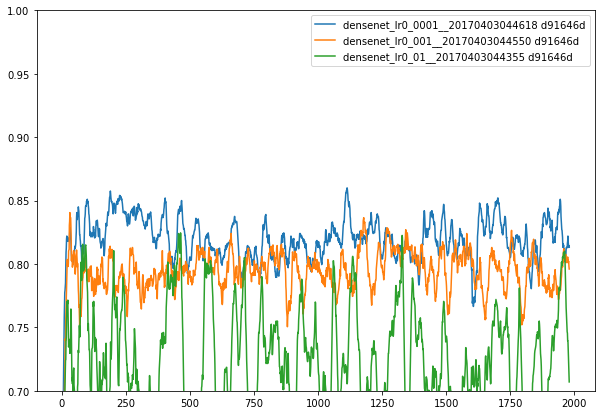

In [77]:
plot_compare([
'snap/config_densenet_lr0_0001__20170403044618.log.json',
'snap/config_densenet_lr0_001__20170403044550.log.json',
'snap/config_densenet_lr0_01__20170403044355.log.json'
], 'val_acc', smoothing=5)

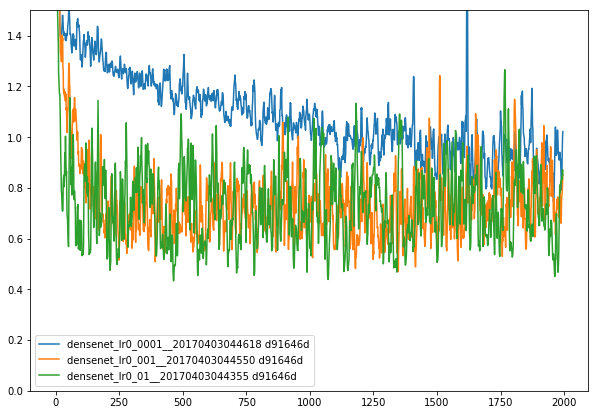

In [137]:
plot_compare([
'snap/config_densenet_lr0_0001__20170403044618.log.json',
'snap/config_densenet_lr0_001__20170403044550.log.json',
'snap/config_densenet_lr0_01__20170403044355.log.json'
], 'val_loss', smoothing=5)

## Binary crossentropy vs categorical crossentropy

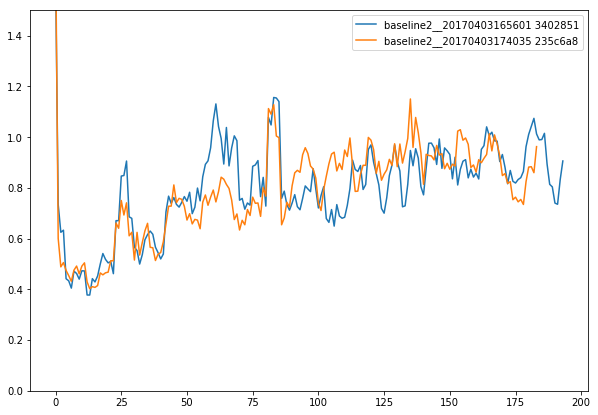

In [157]:
plot_compare([
'snap/config_baseline2__20170403165601.log.json', # 3402851 master:fix scaling border bug
'snap/config_baseline2__20170403174035.log.json' # 235c6a8 binary crossentropy
], 'val_loss', smoothing=5)

## Resolution 16x vs 32x

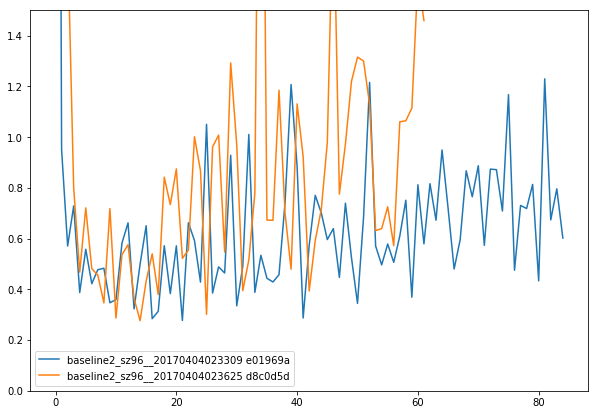

In [173]:
plot_compare([
'snap/config_baseline2_sz96__20170404023309.log.json', # 16x size
'snap/config_baseline2_sz96__20170404023625.log.json' # 32x size
], 'val_loss', smoothing=1)

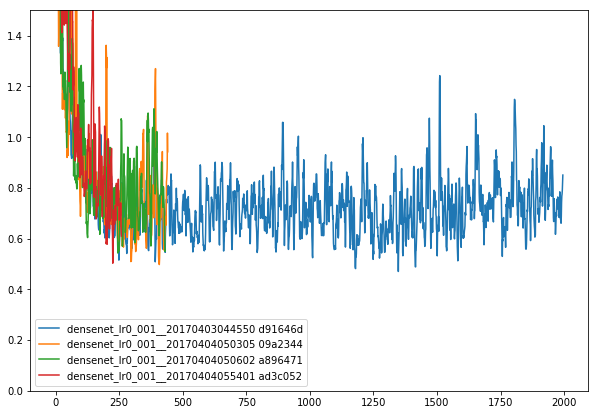

In [177]:
plot_compare([
'snap/config_densenet_lr0_001__20170403044550.log.json',
'snap/config_densenet_lr0_001__20170404050305.log.json', # global average pooling
'snap/config_densenet_lr0_001__20170404050602.log.json', # global average + filters48_growth16
'snap/config_densenet_lr0_001__20170404055401.log.json'  # global average + filters64_growth24
], 'val_loss', smoothing=5)